In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
training_data = np.load('../fashion_train.npy')

In [53]:
image_features = [i for i in training_data[:,:-1]]
image_labels = [i for i in training_data[:,-1]]

image_features = np.array(image_features)
image_labels = np.array(image_labels)

print(image_features.shape, image_labels.shape)

(10000, 784) (10000,)


In [ ]:
# Normalise pixel values to be between 0 and 1.
image_features_norm = image_features / 255

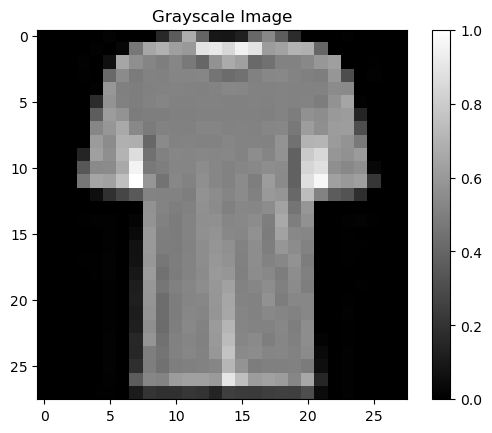

In [ ]:
# Test en hest.
image_x = image_features_norm[0].reshape(28, 28)

# Plotting a grayscale image of random data
plt.imshow(image_x, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.title("Grayscale Image")
plt.show()



In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components=min(image_features_norm.shape[0], image_features_norm.shape[1]))
pca.fit(image_features_norm)

print(pca.explained_variance_ratio_[:60].sum())

print()

0.8980724071322512



In [82]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA


df = pd.DataFrame(image_features_norm)
n_components = 10

pca = PCA(n_components=n_components)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=0,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

c:\Users\krist\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

